# Skript: Pieplot, Heatmap, Pairplot


---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import color_sequences

In [3]:
# Colormaps anschauen:
cmaps = plt.colormaps
print(cmaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 

In [4]:
# Variationen bei seaborn vorhanden:
sns.color_palette('colorblind')
# https://seaborn.pydata.org/tutorial/color_palettes.html

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [5]:
# Standard:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
# Farbpalette festlegen (Standard ist tab10):
sns.set_palette('colorblind')

# 1. Pieplot

---
 
Pieplots / Piecharts, zu Deutsch Tortendiagramme, Kuchendiagramme oder Kreisdiagramme, eignen sich zur **Darstellung von Anteilen einzelner Kategorien/Klassen an einer Gesamtheit**.

* Beispiel: Männlich/weiblich, die drei versch. Pinguin-Arten
* Wichtig: Nur möglichst wenige Kategorien/"Kuchenstücke" verwenden


**Ziel:** Anteile Entdeckungsmethoden im Planeten-Datensatz als Kuchendiagramm darstellen

In [9]:
# Pinguine als "Vorspiel":
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
# Wir müssen erst selbst aggregieren und dann kann erst geplottet werden:
species_count = penguins_df['species'].value_counts()
species_count

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

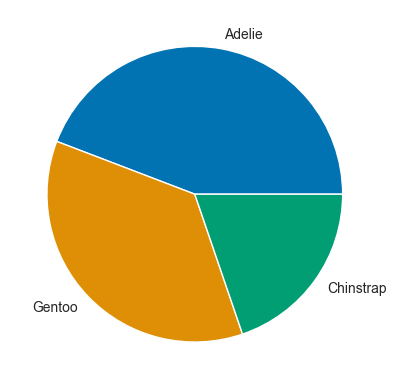

In [13]:
plt.pie(species_count, labels=species_count.index);

In [7]:
# Datensatz
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [8]:
# Wie viele Entdeckungsmethoden?
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [15]:
# Welche am häufigsten?
methods = planets['method'].value_counts()
methods

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [16]:
# Daten reduzieren auf wichtigste Kategorien
methods_reduced = methods[:2]
methods_reduced

method
Radial Velocity    553
Transit            397
Name: count, dtype: int64

In [17]:
# "Other" Kategorie erstellen
other_sum = methods[2:].sum()
other_sum

np.int64(85)

In [19]:
other_series = pd.Series({'Other': other_sum}, name='count')
other_series

Other    85
Name: count, dtype: int64

In [21]:
# Zusammengefasster Datensatz
methods_reduced = pd.concat([methods_reduced, other_series])
methods_reduced

Radial Velocity    553
Transit            397
Other               85
Name: count, dtype: int64

In [24]:
type(methods_reduced)

pandas.core.series.Series

In [25]:
methods_reduced.index

Index(['Radial Velocity', 'Transit', 'Other'], dtype='object')

In [26]:
methods_reduced.values

array([553, 397,  85])

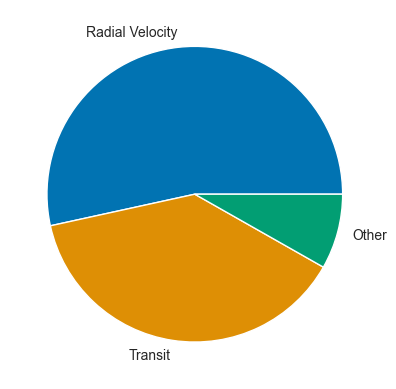

In [23]:
# Einfacher Pieplot
plt.pie(methods_reduced, labels=methods_reduced.index);

Sieht noch nicht so schick aus.
Wir brauchen folgendes:
- Wir wollen den Plot noch drehen können!
- Dateninformationen
- Lieber eine Legende?
- Titel und anderer Schnickschnack?


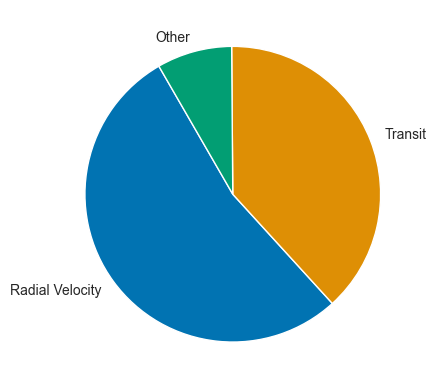

In [38]:
# Drehen mit startangle von 0 bis 360 Grad:
plt.pie(methods_reduced, labels=methods_reduced.index, startangle=120);
# Kuchen wird gegen den Uhrzeigersinn um Gradzahl gedreht.

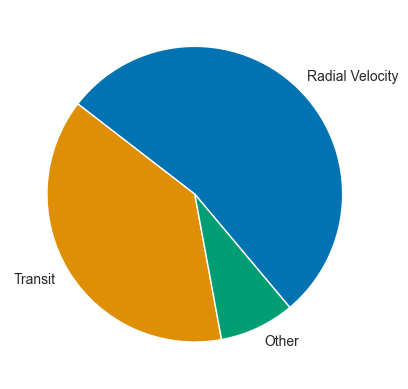

In [41]:
# Mit negativem Vorzeichen dreht es sich im Uhrzeigersinn:
plt.pie(methods_reduced, labels=methods_reduced.index, startangle=-50);

## Kuchenscheiben austrennen

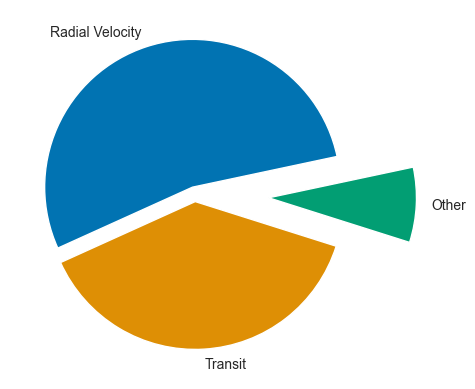

In [51]:
# Mit explode (für gewöhnlich 0 bis 1, da es sich um Anteile des Radius handelt):
plt.pie(
    methods_reduced,
    labels=methods_reduced.index,
    startangle=12,
    explode=[0.05, 0.05, 0.5]
);

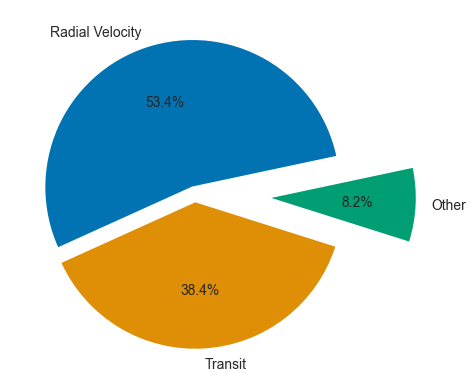

In [52]:
# Anteile anzeigen:
plt.pie(
    methods_reduced,
    labels=methods_reduced.index,
    startangle=12,
    explode=[0.05, 0.05, 0.5],
    autopct='%.1f%%'
);
# % kommt aus der %-Formatierung, die hier stattfindet.
# %% meint eigentlich %. Das erste % hebelt die Bedeutung des zweiten aus.

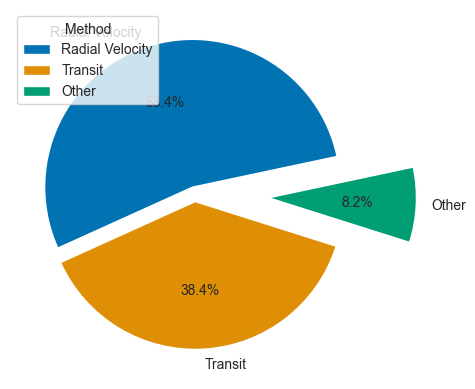

In [65]:
# Legende und Titel
plt.pie(
    methods_reduced,
    labels=methods_reduced.index,
    startangle=12,
    explode=[0.05, 0.05, 0.5],
    autopct='%.1f%%'
)

plt.legend(title='Method',
           loc='upper left');
# Legende wird entweder automatisch positioniert (loc='best', default)
# oder per loc mit einfachen Strings positioniert wie upper right.

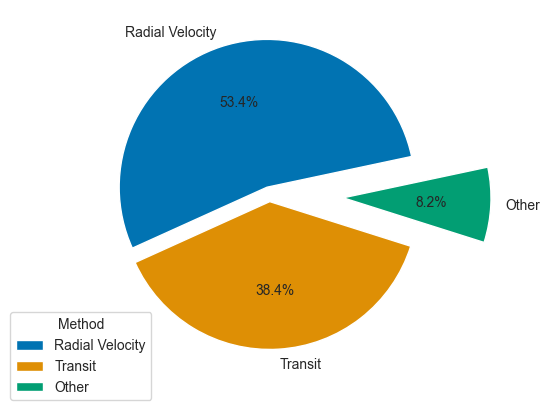

In [97]:
# bbox_to_anchor bietet deutlich mehr Flexibilität, um die Legende zu bewegen:
plt.pie(
    methods_reduced,
    labels=methods_reduced.index,
    startangle=12,
    explode=[0.05, 0.05, 0.5],
    autopct='%.1f%%'
)

plt.legend(title='Method',
           loc='upper right',
           bbox_to_anchor=(0.2, 0.2));


## Donut Plots und verschachtelte Pie Charts

In [98]:
# Titanic: Passagierklassen nach Alterskategorien
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [100]:
# Nach Passagierklassen gruppieren
titanic.groupby('class')

C:\Users\valen\AppData\Local\Temp\ipykernel_3444\525297491.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')


In [103]:
# Exkurs:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [104]:
# Bereich herausslicen, in dem nur zwei Werte der Spalte vorkommen:
diamonds_E_F = diamonds[
    (diamonds["color"] == "E") | (diamonds["color"] == "F")].copy()

In [105]:
diamonds_E_F.groupby('color')

C:\Users\valen\AppData\Local\Temp\ipykernel_3444\2712372637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds_E_F.groupby('color')


In [107]:
# Es kommen zu E und F die Mittelwerte, aber auch zu Kategorien, zu denen gar keine Daten vorliegen,
# die aber hin der Kategorienspalte hinterlegt sind:
diamonds_E_F.groupby('color', observed=False)['price'].mean()

color
D            NaN
E    3076.752475
F    3724.886397
G            NaN
H            NaN
I            NaN
J            NaN
Name: price, dtype: float64

In [108]:
diamonds_E_F.groupby('color', observed=True)['price'].mean()

color
E    3076.752475
F    3724.886397
Name: price, dtype: float64

In [ ]:
# Exkurs ENDE

In [113]:
# Anzahlen pro Klasse erstellen:
class_groups = titanic.groupby('class', observed=False) \
    .size() \
    .rename('count')

class_groups
# size gibt Anzahl Zeilen pro Gruppen (nans werden mitgezählt)

class
First     216
Second    184
Third     491
Name: count, dtype: int64

In [111]:
# Bonus: Was ist der Unterschied zu diesem Code?
titanic.groupby('class', observed=False)['class'] \
    .count() \
    .rename('count')
# count gibt Anzahl Zeilen pro Gruppen, wobei nans ausgeschlossen werden.

class
First     216
Second    184
Third     491
Name: count, dtype: int64

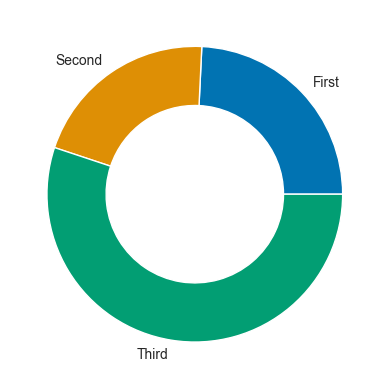

In [131]:
# Unser erster Donut:
plt.pie(
    x=class_groups,
    labels=class_groups.index,
    wedgeprops={'width': 0.4}
);
# Width steuert, wie weit es nach innen geht in Anteilen des Radius'.
# Index würde auch automatisch genommen, wenn x=class_group!

In [132]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [136]:
# Nach Passagierklasse und Personenzustand gruppieren (Anlauf 2):
multi_groups = titanic.groupby(['class', 'who'], observed=True) \
    .size() \
    .reset_index(name='count')

multi_groups
# reset_index macht aus der Series mit Multiindex einen DF mit drei Spalten

,class,who,count
0,First,child,6
1,First,man,119
2,First,woman,91
3,Second,child,19
4,Second,man,99
5,Second,woman,66
6,Third,child,58
7,Third,man,319
8,Third,woman,114


In [140]:
# Auf dem Weg zur Legende:
# 1. Klassenbezeichnungen extrahieren
classes_list = list(class_groups.index)
classes_list

['First', 'Second', 'Third']

In [142]:
# 2. Personenbezeichnungen extrahieren
who_list = list(multi_groups['who'].unique())
who_list

['child', 'man', 'woman']

In [143]:
# Alle Labels für unsere baldige Legende:
labels_list = classes_list + who_list
labels_list

['First', 'Second', 'Third', 'child', 'man', 'woman']

In [144]:
# Farbpalette: tab20c
# tab20c findet sich hier: 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
sns.color_palette('tab20c')

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

In [159]:
multi_groups

,class,who,count
0,First,child,6
1,First,man,119
2,First,woman,91
3,Second,child,19
4,Second,man,99
5,Second,woman,66
6,Third,child,58
7,Third,man,319
8,Third,woman,114


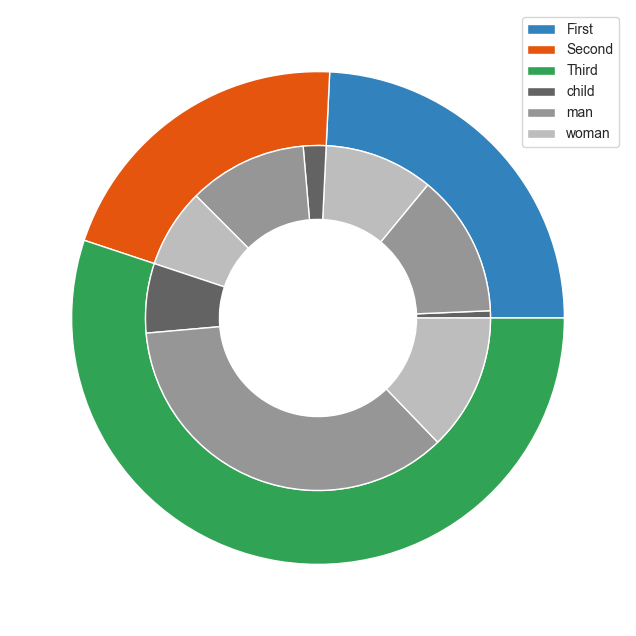

In [177]:
# Colormap festlegen:
cmap = color_sequences['tab20c']
width = 0.3

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(class_groups,
       wedgeprops={'width': width},
       # startend bei 0 bis Ende durch in Viererschritten
       colors=cmap[0::4])

ax.pie(multi_groups['count'],
       wedgeprops={'width': width},
       radius=1 - width,
       colors=cmap[16:19])

ax.legend(labels=labels_list);

# Übungsaufgabe Pieplot

Lade den tips Datensatz und erstelle folgende Graphik:

![output.png](1_pieplot.png)
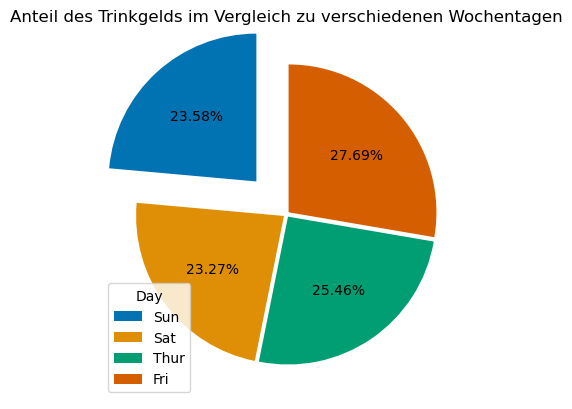

In [182]:
tips = sns.load_dataset("tips")
tips_by_day = tips.groupby("day", observed=True)["tip"].sum()
tips_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

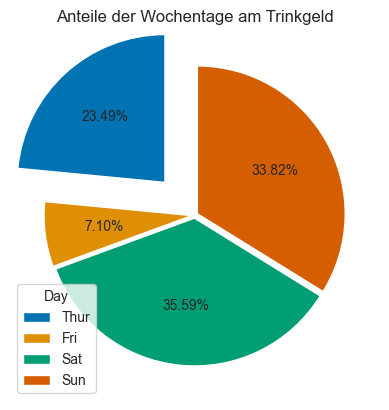

In [184]:
plt.pie(tips_by_day,
        startangle=90,
        explode=[0.3, 0.02, 0.02, 0.02],
        autopct="%.2f%%")

plt.legend(labels=tips_by_day.index,
           title="Day",
           loc='best')

plt.title("Anteile der Wochentage am Trinkgeld");

# 2. Heatmaps

---

Dokumentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html

* Grafische Tabelle, wobei Zellen in Abhängigkeit der Höhe ihrer Werte eingefärbt werden
* Die Einfärbung erfolgt anhand eines Farbverlaufs (sequentielle Farbpalette)
* Gängig bei Korrelationen (farbliche Korrelationsmatrix), aber auch für andere Darstellungen geeignet

Zur Vorbereitung von Daten für Heatmaps wird `pd.pivot_table` wieder interessant. Doku: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [185]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [192]:
diamonds['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [193]:
# Median des Preises nach Farbe und Reinheitsgrad:
diamonds_pivot = diamonds.pivot_table(
    index='clarity',
    columns='color',
    values='price',
    aggfunc='median',
    observed=False,
)

diamonds_pivot

color,D,E,F,G,H,I,J
clarity,,,,,,,
IF,4632.0,1208.0,1046.0,1052.0,1074.0,895.0,1061.0
VVS1,1427.0,1017.0,1140.5,1114.0,968.0,1080.0,1768.0
VVS2,1257.0,1056.0,2041.0,1906.0,881.0,1369.0,4098.0
VS1,1860.0,1668.0,2036.5,1891.5,2175.0,2847.0,3557.5
VS2,1688.0,1662.0,1786.0,2770.0,4082.0,4199.0,4338.0
SI1,1759.0,2257.5,2657.0,2604.0,4564.0,4368.0,4275.5
SI2,3468.0,3612.0,3812.0,4027.0,4547.0,5170.5,4656.0
I1,3774.5,3296.5,2856.0,2999.5,3669.0,3054.5,4546.0


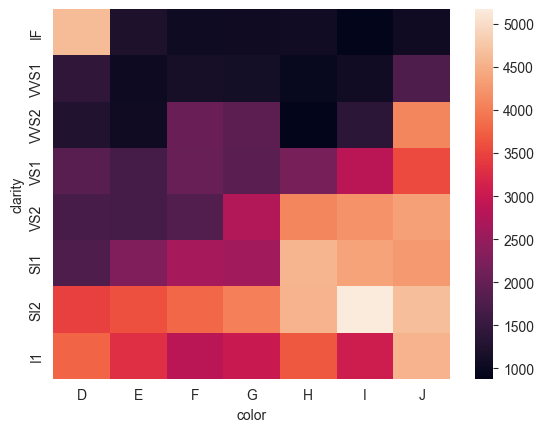

In [194]:
# Einfache Heatmap:
sns.heatmap(diamonds_pivot);

In [196]:
# Das sind NICHT die Werte hinter unserer Skala:
diamonds['price'].agg(['min', 'max'])

min      326
max    18823
Name: price, dtype: int64

In [197]:
# Mit stack kann alle Werte aufeinander als Spalte stapeln:
diamonds_pivot.stack()

clarity  color
IF       D        4632.0
         E        1208.0
         F        1046.0
         G        1052.0
         H        1074.0
         I         895.0
         J        1061.0
VVS1     D        1427.0
         E        1017.0
         F        1140.5
         G        1114.0
         H         968.0
         I        1080.0
         J        1768.0
VVS2     D        1257.0
         E        1056.0
         F        2041.0
         G        1906.0
         H         881.0
         I        1369.0
         J        4098.0
VS1      D        1860.0
         E        1668.0
         F        2036.5
         G        1891.5
         H        2175.0
         I        2847.0
         J        3557.5
VS2      D        1688.0
         E        1662.0
         F        1786.0
         G        2770.0
         H        4082.0
         I        4199.0
         J        4338.0
SI1      D        1759.0
         E        2257.5
         F        2657.0
         G        2604.0
         H

In [198]:
# Das hier besorgt die Grenzen unserer Skala:
diamonds_pivot.stack().agg(['min', 'max'])

min     881.0
max    5170.5
dtype: float64

In [201]:
# Weniger schöner Ansatz:
print(diamonds_pivot.min().min())
print(diamonds_pivot.max().max())

881.0
5170.5


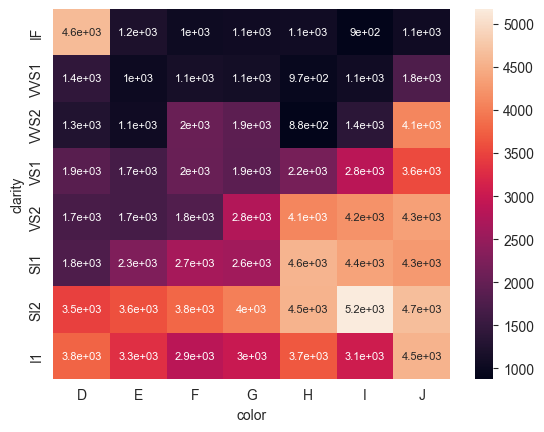

In [209]:
# Annotationen
sns.heatmap(
    diamonds_pivot,
    annot=True,
    annot_kws={'fontsize': 8}
);

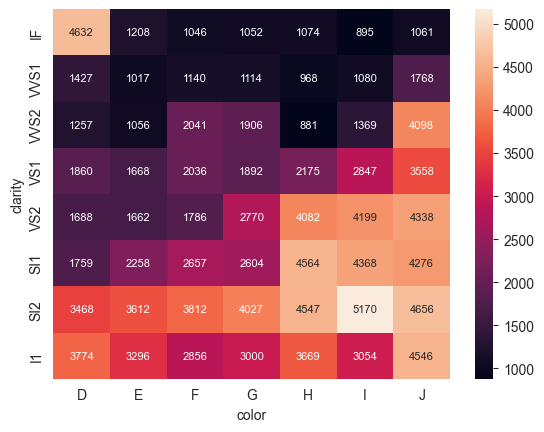

In [210]:
# Mit Formatcode lassen sich Zahlen besser darstellen.
# Video: https://www.youtube.com/watch?v=ry2gMuC9mw0
sns.heatmap(
    diamonds_pivot,
    annot=True,
    annot_kws={'fontsize': 8},
    fmt='.0f'
);

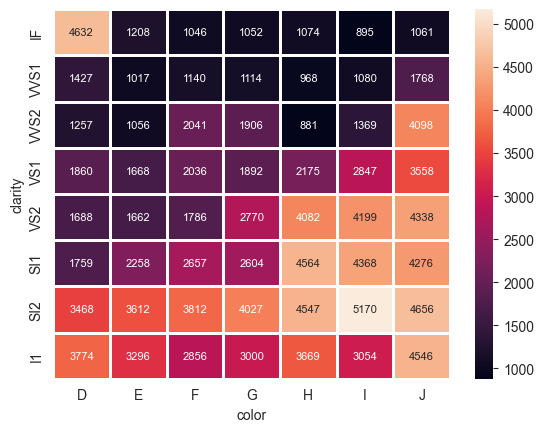

In [212]:
# Lücken/Linien zwischen den Kacheln erzeugen:
sns.heatmap(
    diamonds_pivot,
    annot=True,
    annot_kws={'fontsize': 8},
    fmt='.0f',
    lw=1
);

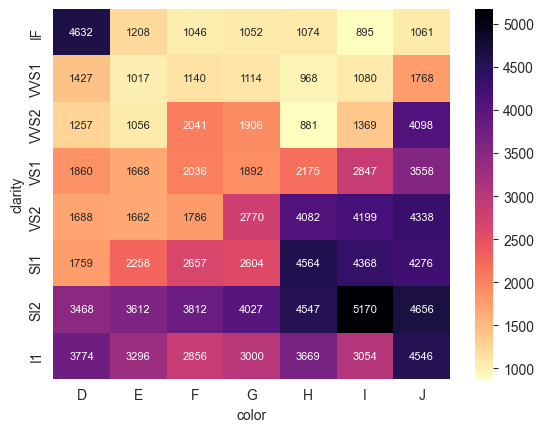

In [215]:
# Farbpalette ändern
# Umdrehen von Farbpaletten mit Anhängen von "_r" möglich:
sns.heatmap(diamonds_pivot,
            annot=True,
            annot_kws={'fontsize': 8},
            fmt='.0f',
            cmap='magma_r');

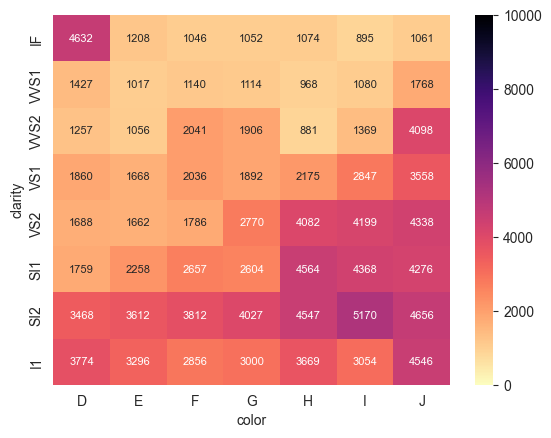

In [218]:
sns.heatmap(
    diamonds_pivot,
    annot=True,
    annot_kws={'fontsize': 8},
    fmt='.0f',
    cmap='magma_r',
    vmin=0,
    vmax=10_000,
);

### Übungsaufgabe Heatmap

Erstelle die folgende Grafik (Datensatz: `tips`):

![image.png](2_heatmap.png)
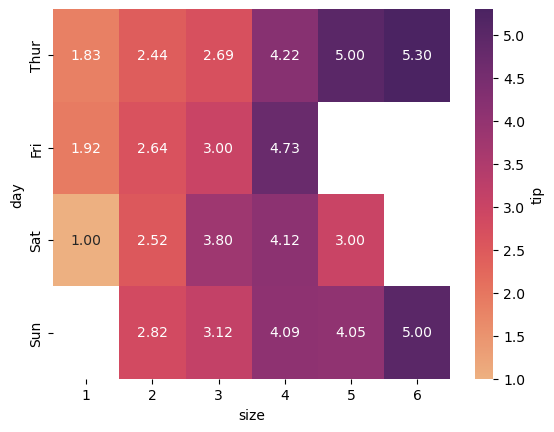

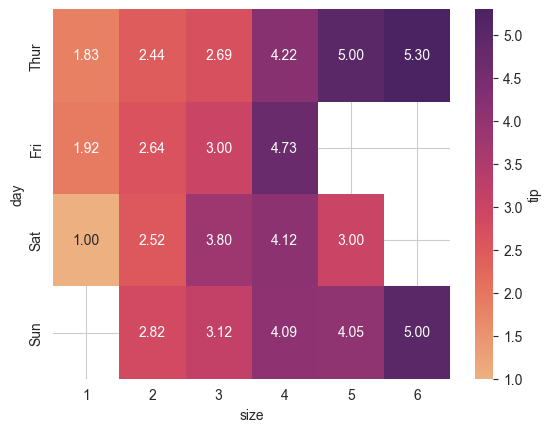

In [230]:
tip = sns.load_dataset("tips")

tip_pivot = tip.pivot_table(index="day",
                            columns="size",
                            values="tip",
                            aggfunc="mean",
                            observed=False)

sns.heatmap(tip_pivot,
            annot=True,
            fmt=".2f",
            cmap="flare",
            cbar_kws={"label": "tip"});

# Pairplot

Figure-level Plot-Funktion ähnlich wie `sns.relplot`. `relplot` stellt in Zeilen oder Spalten von Plots die einzelnen Kategorien einer Spalte dar, während `pairplot` Kombinationen von Variablen über Spalten und Zeilen darstellt.

* Paarweise Darstellung aller Kombinationen numerischer (!) Spalten eines Datensatzes
* Gewöhnlich als Scatterplots dargestellt mit Ausnahme der Diagonalen.
* In der Diagonalen finden sich Histogramme (oder KDE-Plots), die Auskunft über die Verteilung der Variablen geben 
* Link zur Doku: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [219]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


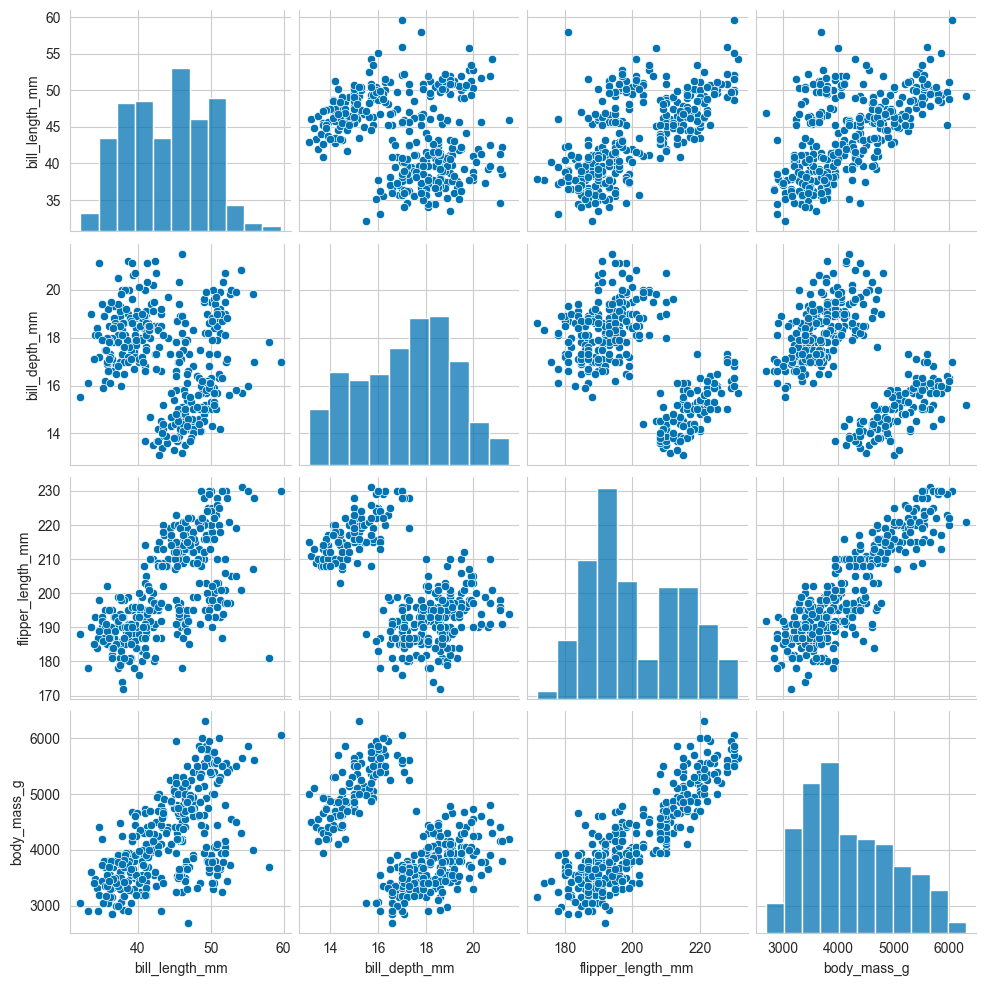

In [220]:
# Einfacher Pairplot
sns.pairplot(penguins)

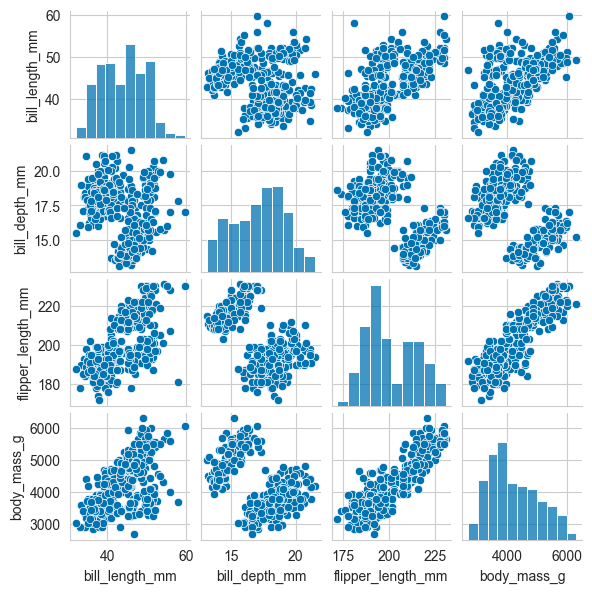

In [221]:
# Wenn's kleiner werden soll (height in Inchgröße jedes Subplots):
sns.pairplot(penguins, height=1.5);

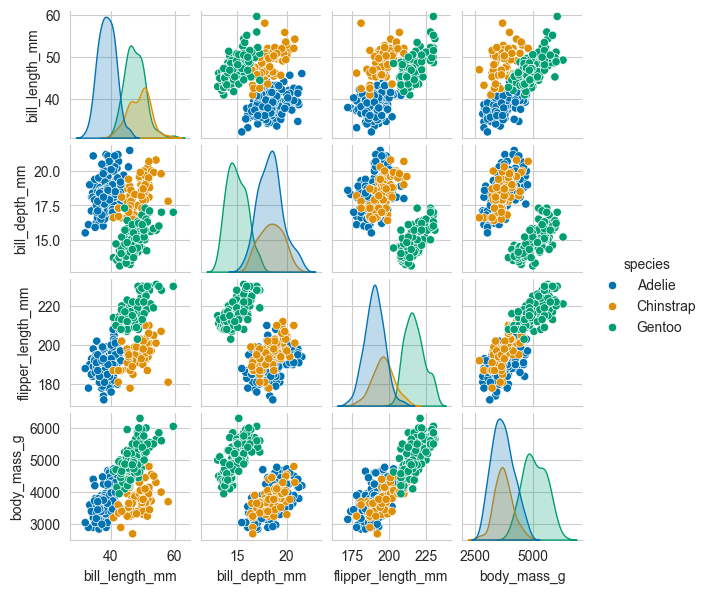

In [222]:
# Auch Gruppierung nach Farbe möglich
sns.pairplot(
    penguins,
    hue='species',
    height=1.5,
);

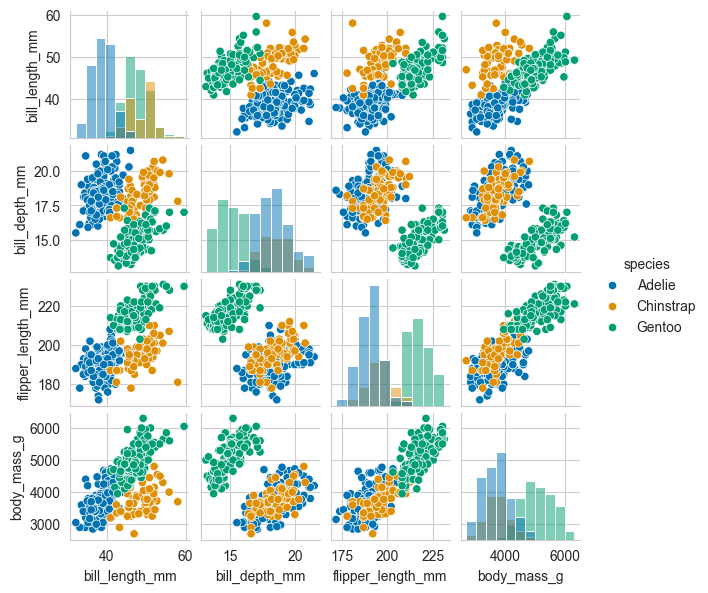

In [223]:
# Änderung der angezeigten Plot-Formen
# Histogramm in der Diagonalen
sns.pairplot(
    penguins,
    hue='species',
    height=1.5,
    diag_kind='hist',
);

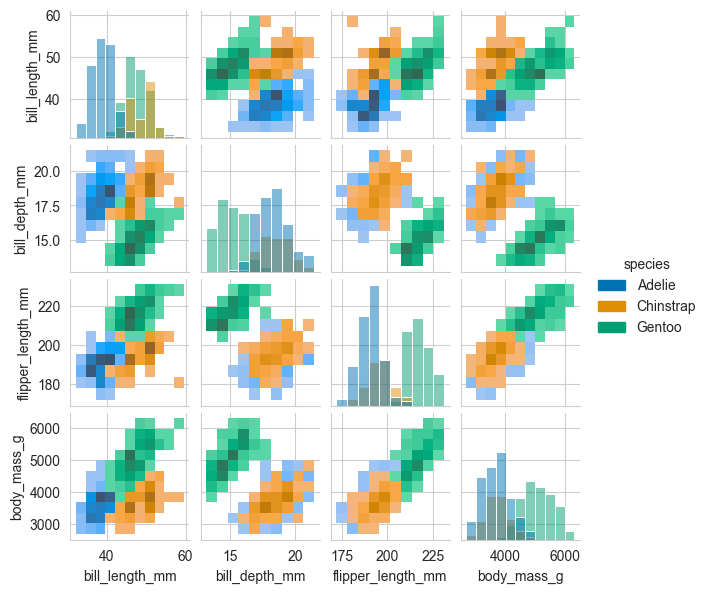

In [224]:
# 2D-Histogramme
sns.pairplot(
    penguins,
    hue='species',
    height=1.5,
    kind='hist',
    diag_kind='hist',
);

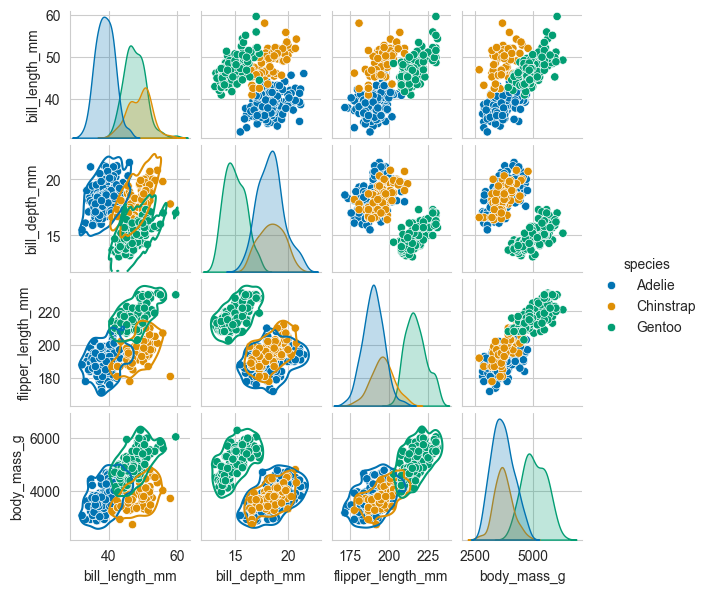

In [228]:
# KDE-Plot zu Datenpunkten hinzufügen
ax = sns.pairplot(penguins,
                  height=1.5,
                  hue='species')

ax.map_lower(sns.kdeplot, levels=2);

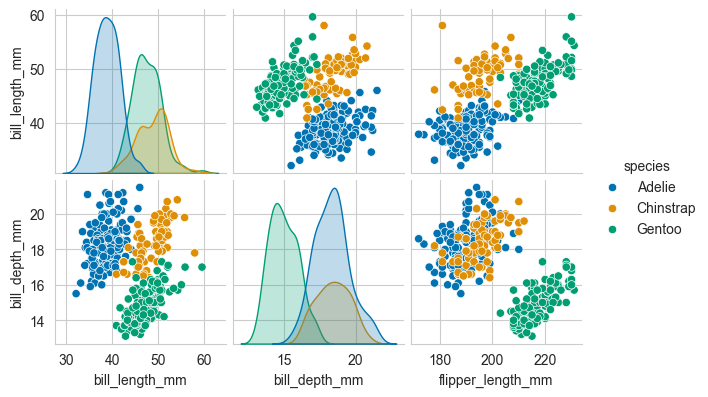

In [229]:
# Selektierung der Variablen
sns.pairplot(
    penguins,
    height=2,
    hue='species',
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"]
);

# Übungsaufgabe Pairplot

Erstelle die gezeigte Graphik (Datensatz `tips`):

![output.png](3_pairplot.png)
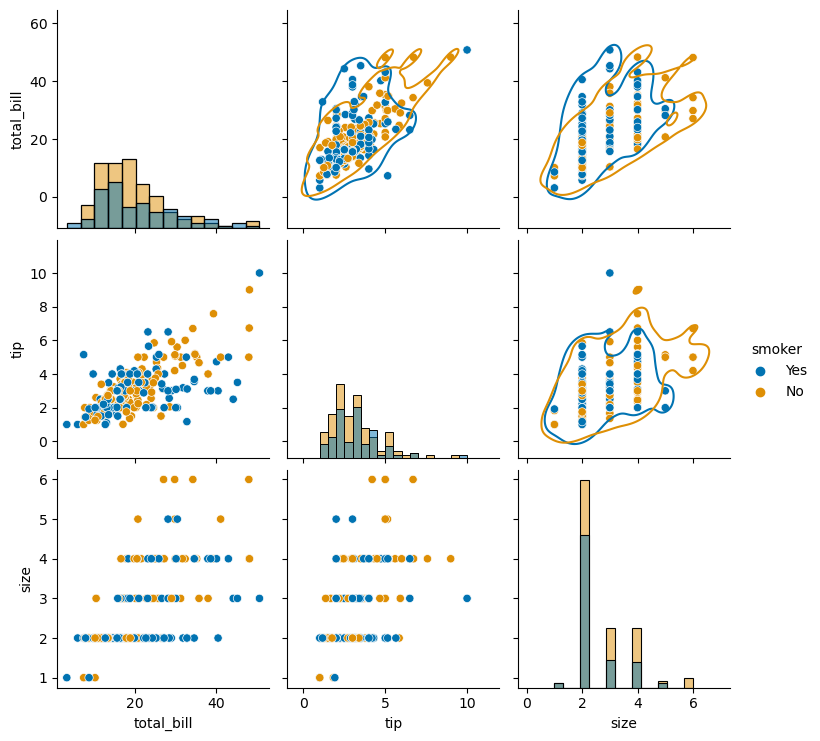

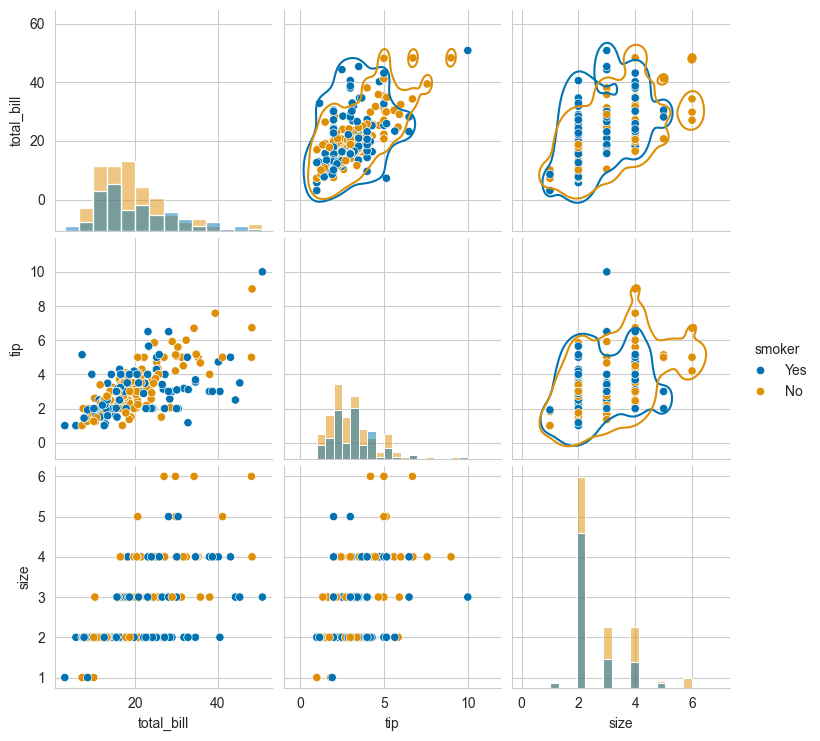

In [231]:
# Lösung
plot = sns.pairplot(tip,
                    hue="smoker",
                    diag_kind="hist")

plot.map_upper(sns.kdeplot, levels=1);